In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import warnings

warnings.filterwarnings('ignore')

PATH_GEOJSON = 'https://raw.githubusercontent.com/dosm-malaysia/data-open/main/datasets/geodata/'
PATH_CENSUS = 'https://raw.githubusercontent.com/dosm-malaysia/data-open/main/datasets/census/'

In [2]:
plotvars = {
    'poverty_incidence': 'Reds',
    'utilities_pipedwater_home': 'Blues',
    'utilities_electricity_home': 'viridis'
}

vartitles = {
    'poverty_incidence': 'Incidence of Poverty (%)',
    'utilities_pipedwater_home': 'Access to Piped Water at Home (%)',
    'utilities_electricity_home': 'Access to Electricity at Home (%)'
}

df = pd.read_csv(PATH_CENSUS + 'census_parlimen.csv',usecols=['parlimen'] + list(plotvars.keys()))
df.head()

,parlimen,poverty_incidence,utilities_pipedwater_home,utilities_electricity_home
0,P.001 Padang Besar,5.7,99.7,100.0
1,P.002 Kangar,4.2,99.4,100.0
2,P.003 Arau,1.4,99.8,100.0
3,P.004 Langkawi,0.9,99.5,100.0
4,P.005 Jerlun,6.7,99.0,100.0


In [3]:
geo_state = gpd.read_file(PATH_GEOJSON + 'administrative_1_state.geojson')
geo_parl = gpd.read_file(PATH_GEOJSON + 'electoral_0_parlimen.geojson')

# This step moves peninsular Malaysia to create a more visually compact map - comment out if you want original map
for temp,name in zip([geo_state,geo_parl],['state','parlimen','dun']):
    temp.loc[~temp.code_state.isin([12, 13, 15]), 'geometry'] = temp.geometry.translate(9, 4.5)

geo_parl = pd.merge(geo_parl,df,on='parlimen',how='left')
geo_parl.head()

,state,parlimen,code_state,code_parlimen,geometry,poverty_incidence,utilities_pipedwater_home,utilities_electricity_home
0,Perlis,P.001 Padang Besar,9,P.001,"MULTIPOLYGON (((109.20513 11.22227, 109.20778 ...",5.7,99.7,100.0
1,Perlis,P.002 Kangar,9,P.002,"MULTIPOLYGON (((109.16465 11.07050, 109.16618 ...",4.2,99.4,100.0
2,Perlis,P.003 Arau,9,P.003,"MULTIPOLYGON (((109.36581 10.98322, 109.36314 ...",1.4,99.8,100.0
3,Kedah,P.004 Langkawi,2,P.004,"MULTIPOLYGON (((108.79701 10.65851, 108.79812 ...",0.9,99.5,100.0
4,Kedah,P.005 Jerlun,2,P.005,"MULTIPOLYGON (((109.35617 10.94752, 109.35880 ...",6.7,99.0,100.0


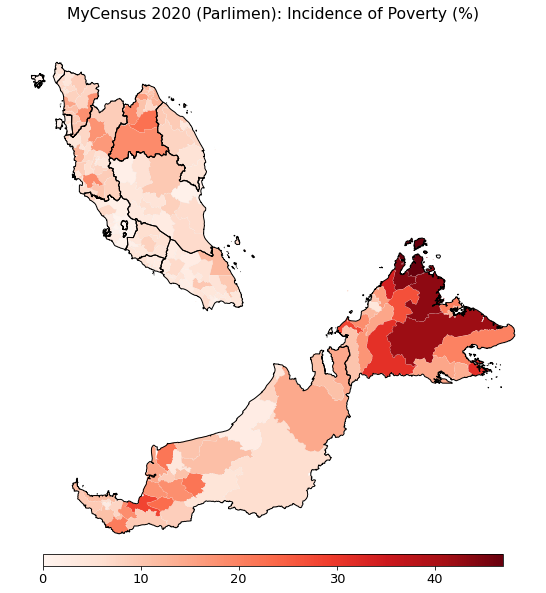

In [4]:
plt.rcParams.update({'font.size': 13,
                     'font.family':'sans-serif',
                     'grid.linestyle': 'dotted',
                     'figure.figsize': [8,8],
                     'figure.autolayout': True})

# Over here, 3 maps are plotted separately for display only. 
# Best practice is to loop it; see last cell
v = list(plotvars.keys())[0]
fig, ax = plt.subplots()
ax.axis('off')

vmin,vmax = geo_parl[v].min(),geo_parl[v].max()
cmap = plotvars[v]
geo_parl.plot(column=v, cmap=cmap, vmin=vmin, vmax=vmax, linewidth=0.1, edgecolor='#f2f2f2', ax=ax)
geo_state.plot(edgecolor='black', linewidth=1, facecolor='none', ax=ax)
cbar_ax = fig.add_axes([0.1, 0.01, 0.8, 0.02])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax, orientation="horizontal")
plt.suptitle('MyCensus 2020 (Parlimen): ' + vartitles[v])
plt.show()

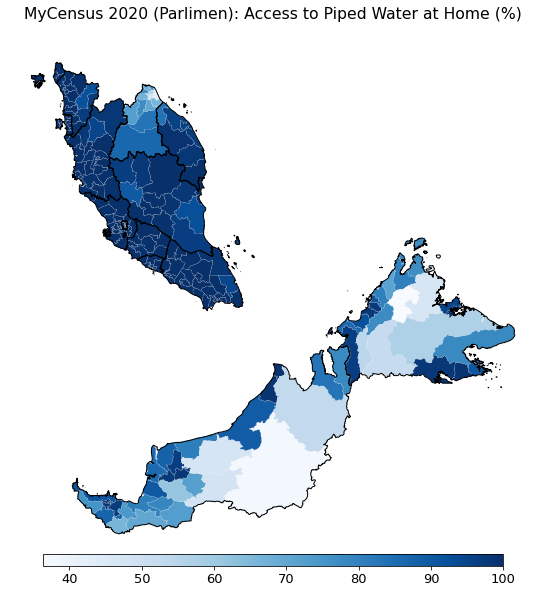

In [5]:
v = list(plotvars.keys())[1]
fig, ax = plt.subplots()
ax.axis('off')

vmin,vmax = geo_parl[v].min(),geo_parl[v].max()
cmap = plotvars[v]
geo_parl.plot(column=v, cmap=cmap, vmin=vmin, vmax=vmax, linewidth=0.1, edgecolor='#f2f2f2', ax=ax)
geo_state.plot(edgecolor='black', linewidth=1, facecolor='none', ax=ax)
cbar_ax = fig.add_axes([0.1, 0.01, 0.8, 0.02])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax, orientation="horizontal")
plt.suptitle('MyCensus 2020 (Parlimen): ' + vartitles[v])
plt.show()

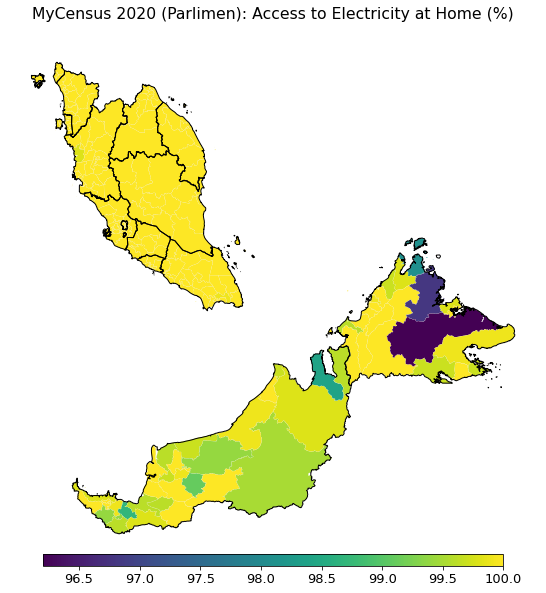

In [6]:
v = list(plotvars.keys())[2]
fig, ax = plt.subplots()
ax.axis('off')

vmin,vmax = geo_parl[v].min(),geo_parl[v].max()
cmap = plotvars[v]
geo_parl.plot(column=v, cmap=cmap, vmin=vmin, vmax=vmax, linewidth=0.1, edgecolor='#f2f2f2', ax=ax)
geo_state.plot(edgecolor='black', linewidth=1, facecolor='none', ax=ax)
cbar_ax = fig.add_axes([0.1, 0.01, 0.8, 0.02])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax, orientation="horizontal")
plt.suptitle('MyCensus 2020 (Parlimen): ' + vartitles[v])
plt.show()

In [7]:
# for v in list(plotvars.keys()):
#     fig, ax = plt.subplots()
#     ax.axis('off')

#     vmin,vmax = geo_parl[v].min(),geo_parl[v].max()
#     cmap = plotvars[v]
#     geo_parl.plot(column=v, cmap=cmap, vmin=vmin, vmax=vmax, linewidth=0.1, edgecolor='#f2f2f2', ax=ax)
#     geo_state.plot(edgecolor='black', linewidth=1, facecolor='none', ax=ax)
#     cbar_ax = fig.add_axes([0.1, 0.01, 0.8, 0.02])
#     cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax, orientation="horizontal")
#     plt.suptitle('MyCensus 2020 (Parlimen): ' + vartitles[v])
#     plt.show()